In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [4]:
X_full = pd.read_csv('train.csv', index_col='id')
X_test_full = pd.read_csv('test.csv', index_col='id')

In [6]:
from scipy import stats

# plotting modules
import seaborn as sns

In [8]:
X_full.columns

Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6',
       'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13',
       'target'],
      dtype='object')

Text(0.5, 1.0, 'Normalized data')

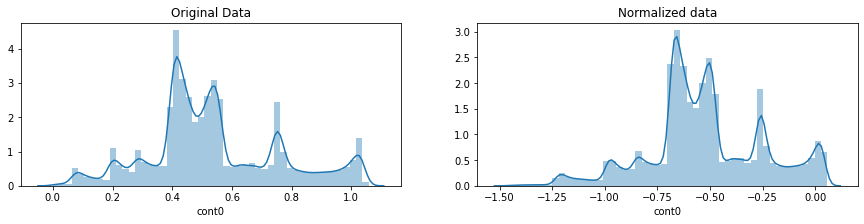

In [11]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_positive_cont0 = X_full.cont0 > 0

# get only positive pledges (using their indexes)
positive_cont0 = X_full.cont0.loc[index_of_positive_cont0]

# normalize the pledges (w/ Box-Cox)
normalized_cont0 = pd.Series(stats.boxcox(positive_cont0)[0], 
                               name='cont0', index=positive_cont0.index)

# plot both together to compare
fig, ax=plt.subplots(1,2,figsize=(15,3))
sns.distplot(positive_cont0, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_cont0, ax=ax[1])
ax[1].set_title("Normalized data")

In [12]:
from sklearn.preprocessing import MinMaxScaler

Text(0.5, 1.0, 'Normalized data')

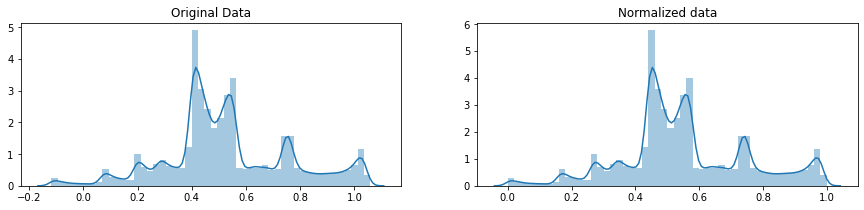

In [16]:
o = pd.DataFrame(X_full.cont0)

scaler = MinMaxScaler()
# transform data
s = scaler.fit_transform(o)




fig, ax=plt.subplots(1,2,figsize=(15,3))
sns.distplot(o, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(s, ax=ax[1])
ax[1].set_title("Normalized data")

In [4]:
X_full.dropna(subset=['target'], axis=0, inplace=True)
y = X_full.target
X_full.drop('target', axis=1, inplace=True)

**check missing value**

In [5]:
X_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 1 to 499999
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    300000 non-null  object 
 1   cat1    300000 non-null  object 
 2   cat2    300000 non-null  object 
 3   cat3    300000 non-null  object 
 4   cat4    300000 non-null  object 
 5   cat5    300000 non-null  object 
 6   cat6    300000 non-null  object 
 7   cat7    300000 non-null  object 
 8   cat8    300000 non-null  object 
 9   cat9    300000 non-null  object 
 10  cont0   300000 non-null  float64
 11  cont1   300000 non-null  float64
 12  cont2   300000 non-null  float64
 13  cont3   300000 non-null  float64
 14  cont4   300000 non-null  float64
 15  cont5   300000 non-null  float64
 16  cont6   300000 non-null  float64
 17  cont7   300000 non-null  float64
 18  cont8   300000 non-null  float64
 19  cont9   300000 non-null  float64
 20  cont10  300000 non-null  float64
 21  cont11  30

In [6]:
X_full.isnull().sum()

cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
dtype: int64

In [7]:
X_full.describe()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.527335,0.460926,0.490498,0.496689,0.491654,0.510526,0.467476,0.537119,0.498456,0.474872,0.474492,0.473216,0.494561,0.508273
std,0.230599,0.214003,0.253346,0.219199,0.240074,0.228232,0.210331,0.218140,0.239920,0.218007,0.255949,0.222022,0.247292,0.222950
min,-0.118039,-0.069309,-0.056104,0.130676,0.255908,0.045915,-0.224689,0.203763,-0.260275,0.117896,0.048732,0.052608,-0.074208,0.151050
25%,0.405965,0.310494,0.300604,0.329783,0.284188,0.354141,0.342873,0.355825,0.332486,0.306874,0.276017,0.308151,0.289074,0.300669
50%,0.497053,0.427903,0.502462,0.465026,0.390470,0.488865,0.429383,0.504661,0.439151,0.434620,0.459975,0.433812,0.422887,0.472400
75%,0.668060,0.615113,0.647512,0.664451,0.696599,0.669625,0.573383,0.703441,0.606056,0.614333,0.691579,0.642057,0.714502,0.758447
max,1.058443,0.887253,1.034704,1.039560,1.055424,1.067649,1.111552,1.032837,1.040229,0.982922,1.055960,1.071444,0.975035,0.905992


In [8]:
X_full['cat0'].value_counts()/X_full['cat0'].value_counts().sum()

A    0.643767
B    0.356233
Name: cat0, dtype: float64

In [9]:
for col in X_full.columns:
    if (X_full[col].dtype == 'object'):
        print(str(col)+':')
        print(X_full[col].value_counts()/X_full[col].value_counts().sum())
        print()

cat0:
A    0.643767
B    0.356233
Name: cat0, dtype: float64

cat1:
A    0.51608
B    0.48392
Name: cat1, dtype: float64

cat2:
A    0.846287
B    0.153713
Name: cat2, dtype: float64

cat3:
C    0.877853
A    0.105753
D    0.014427
B    0.001967
Name: cat3, dtype: float64

cat4:
B    0.982457
A    0.009927
C    0.005907
D    0.001710
Name: cat4, dtype: float64

cat5:
B    0.497800
D    0.420457
C    0.067493
A    0.014250
Name: cat5, dtype: float64

cat6:
A    0.968370
B    0.026727
C    0.003093
D    0.000973
I    0.000453
H    0.000187
E    0.000150
G    0.000047
Name: cat6, dtype: float64

cat7:
E    0.920133
D    0.040480
B    0.027657
G    0.009567
F    0.001873
C    0.000120
A    0.000103
I    0.000067
Name: cat7, dtype: float64

cat8:
C    0.370343
E    0.266147
A    0.255283
G    0.087093
D    0.017290
F    0.003220
B    0.000623
Name: cat8, dtype: float64

cat9:
F    0.237497
I    0.197393
G    0.094177
L    0.069860
H    0.066417
K    0.060190
N    0.055680
B    0.048257
J   

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train_full, X_valid_full, y_train, y_vaid = train_test_split(X_full, y, test_size=0.2, random_state=1)

In [12]:
num_cols = [col for col in X_train_full.columns if X_train_full[col].dtypes in ['int64', 'float64']]

cat_cols = [col for col in X_train_full.columns if X_train_full[col].nunique() < 10 and X_train_full[col].dtype == 'object']

In [13]:
my_cols = num_cols + cat_cols

X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

# Train

In [14]:
num_trans = SimpleImputer(strategy='mean')

cat_trans = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                            ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [15]:
preprocessor = ColumnTransformer(transformers=[('num', num_trans, num_cols),
                                        ('cat', cat_trans, cat_cols)])

In [16]:
my_model = RandomForestRegressor(n_estimators=100, random_state=1)

In [17]:
models = Pipeline(steps=[('preprocessor', preprocessor), ('model', my_model)])

In [18]:
models.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['cont0', 'cont1', 'cont2',
                                                   'cont3', 'cont4', 'cont5',
                                                   'cont6', 'cont7', 'cont8',
                                                   'cont9', 'cont10', 'cont11',
                                                   'cont12', 'cont13']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['cat0', 'cat1', 'cat2',


In [21]:
pr = models.predict(X_train)
preds = models.predict(X_valid)
print('RMSE:', mean_squared_error(y_train, pr, squared=False))
print('RMSE:', mean_squared_error(y_vaid, preds, squared=False))

RMSE: 0.2753472447284073
RMSE: 0.7331196969184158


In [22]:
preds_test = models.predict(X_test)

In [23]:
output = pd.DataFrame({'id': X_test.index, 'target': preds_test})

output.to_csv('submission_1.csv', index=False)